In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Сгенерируем случайный набор данных из 30 значений.

In [3]:
data_points = np.array([[i, np.random.random() * 3 + i + 5] for i in range(1, 31)])

Построим график для сгенерированных данных.

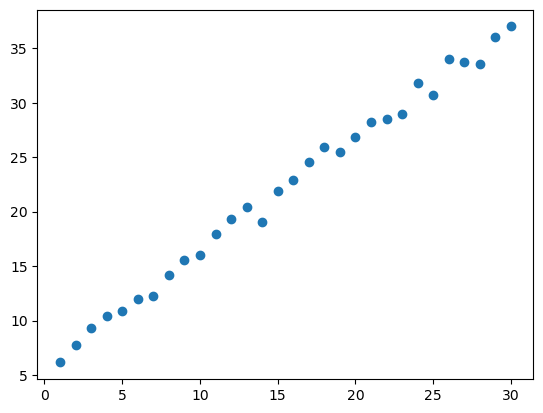

In [19]:
plt.scatter(data_points[:, 0], data_points[:, 1])

In [20]:
X_custom = np.column_stack((data_points[:, 0], np.ones(len(data_points))))
Y_custom = data_points[:, 1]

Выведем функцию для градиентного спуска.

In [21]:
def gradient_descent_step(a0, b0):
    return np.array([np.sum(-2 * (Y_custom - np.dot(X_custom, [a0, b0])) * X_custom[:, 0]),
                     np.sum(-2 * (Y_custom - np.dot(X_custom, [a0, b0])))])

Зададим начальные параметры.

In [22]:
parameters_custom = np.array([0, 0])
results_custom = []
learning_rate_custom = 0.00001

Выполним градиентный спуск.

In [23]:
while True:
    results_custom.append(parameters_custom)
    new_parameters_custom = parameters_custom - learning_rate_custom * gradient_descent_step(*parameters_custom)
    if np.linalg.norm(new_parameters_custom - parameters_custom) <= 0.0001:
        break
    parameters_custom = new_parameters_custom

In [24]:
print("Парметры по градиентному спуску:", parameters_custom)

Парметры по градиентному спуску: [1.07327708 5.2457723 ]


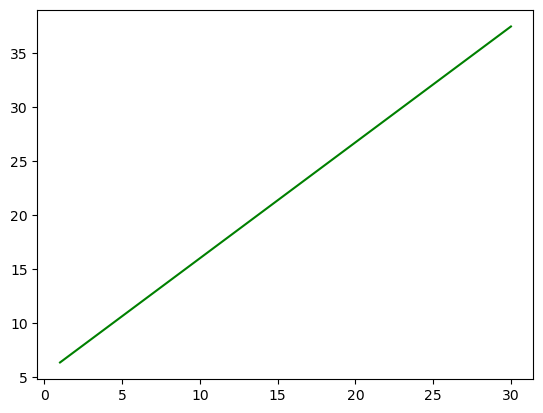

In [25]:
plt.plot(data_points[:, 0], parameters_custom[1] + parameters_custom[0] * data_points[:, 0], color='green')

Воспользуемся библиотекой scikit-learn.

In [26]:
X_sklearn = data_points[:, 0].reshape(-1, 1)
Y_sklearn = data_points[:, 1]

regression_model = LinearRegression().fit(X_sklearn, Y_sklearn)

In [28]:
print("Коэффициент регрессии:", regression_model.coef_)
print("Свободный член:", regression_model.intercept_)

Коэффициент регрессии: [1.03872674]
Свободный член: 5.9477672899760385


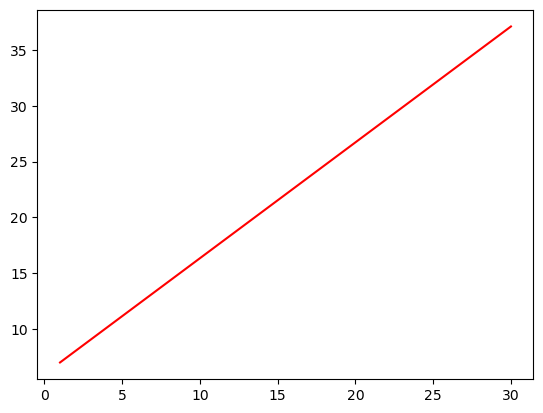

In [29]:
plt.plot(data_points[:, 0], regression_model.predict(X_sklearn), color='red')

Сравним два метода графически.

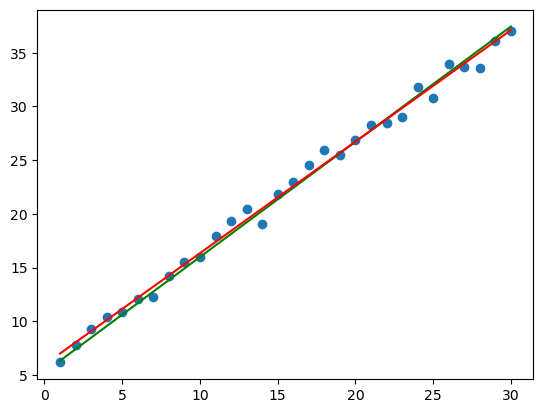

In [30]:
plt.scatter(data_points[:, 0], data_points[:, 1])
plt.plot(data_points[:, 0], parameters_custom[1] + parameters_custom[0] * data_points[:, 0], color='green')
plt.plot(data_points[:, 0], regression_model.predict(X_sklearn), color='red')

plt.show()